<a href="https://colab.research.google.com/github/LuchoValr/Semillero/blob/main/Proyecto_semillero_Avance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wbgapi
import wbgapi as wb
#Pais, tipo de relacion, año y valor

##Exportaciones por pais

In [4]:
ex_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/exportaciones%20por%20pais.txt')

In [5]:
exp_2 = ex_p.rename(columns={'Importadores':'Paises','Valor exportado en 2001':'2001','Valor exportado en 2002':'2002','Valor exportado en 2003':'2003','Valor exportado en 2004':'2004','Valor exportado en 2005':'2005','Valor exportado en 2006':'2006','Valor exportado en 2007':'2007','Valor exportado en 2008':'2008','Valor exportado en 2009':'2009','Valor exportado en 2010':'2010','Valor exportado en 2011':'2011','Valor exportado en 2012':'2012','Valor exportado en 2013':'2013','Valor exportado en 2014':'2014','Valor exportado en 2015':'2015','Valor exportado en 2016':'2016','Valor exportado en 2017':'2017','Valor exportado en 2018':'2018','Valor exportado en 2019':'2019','Valor exportado en 2020':'2020'})
exp_21=exp_2.insert(1, "Relacion", 'Importadores', allow_duplicates=False)
exp_3=exp_2.drop(['Unnamed: 21'],axis=1)
exp_4=pd.melt(exp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
exp_5=exp_4.drop(['index'],axis=1)
exp_5

,Paises,Relacion,variable,value
0,Mundo,Importadores,2001,12301486
1,Estados Unidos de América,Importadores,2001,5344533
2,China,Importadores,2001,19907
3,Panamá,Importadores,2001,265163
4,Ecuador,Importadores,2001,699929
...,...,...,...,...
4555,Timor-Leste,Importadores,2020,0
4556,Seychelles,Importadores,2020,0
4557,Sudán (antes de 2012),Importadores,2020,0
4558,Uzbekistán,Importadores,2020,0


##Importaciones por pais

In [6]:
im_p = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Semillero/main/Datos/importaciones%20por%20pais.txt')

In [7]:
im_p2=im_p.rename(columns={'Exportadores':'Paises','Valor importado en 2001':'2001','Valor importado en 2002':'2002','Valor importado en 2003':'2003','Valor importado en 2004':'2004','Valor importado en 2005':'2005','Valor importado en 2006':'2006','Valor importado en 2007':'2007','Valor importado en 2008':'2008','Valor importado en 2009':'2009','Valor importado en 2010':'2010','Valor importado en 2011':'2011','Valor importado en 2012':'2012','Valor importado en 2013':'2013','Valor importado en 2014':'2014','Valor importado en 2015':'2015','Valor importado en 2016':'2016','Valor importado en 2017':'2017','Valor importado en 2018':'2018','Valor importado en 2019':'2019','Valor importado en 2020':'2020'})
imp_21=im_p2.insert(1, "Relacion", 'Exportadores', allow_duplicates=False)
imp_3=im_p2.drop(['Unnamed: 21'],axis=1)
imp_4=pd.melt(imp_3, id_vars=['Paises','Relacion'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
imp_5=imp_4.drop(['index'],axis=1)
imp_5

,Paises,Relacion,variable,value
0,Mundo,Exportadores,2001,12820352
1,Estados Unidos de América,Exportadores,2001,4442775
2,China,Exportadores,2001,475405
3,México,Exportadores,2001,596168
4,Brasil,Exportadores,2001,582060
...,...,...,...,...
4535,Islas Turks y Caicos,Exportadores,2020,0
4536,Burkina Faso,Exportadores,2020,0
4537,Samoa,Exportadores,2020,0
4538,Yemen,Exportadores,2020,0


In [8]:
mundo= pd.concat([exp_5, imp_5])
M1=mundo.rename(columns={'variable':'Años','value':'Valor'}).drop([0]).reset_index()
M1.drop(['index'],axis=1)


,Paises,Relacion,Años,Valor
0,Estados Unidos de América,Importadores,2001,5344533
1,China,Importadores,2001,19907
2,Panamá,Importadores,2001,265163
3,Ecuador,Importadores,2001,699929
4,Brasil,Importadores,2001,166704
...,...,...,...,...
9093,Islas Turks y Caicos,Exportadores,2020,0
9094,Burkina Faso,Exportadores,2020,0
9095,Samoa,Exportadores,2020,0
9096,Yemen,Exportadores,2020,0


HALLAR MISSING VALUES

In [9]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9098 non-null   int64 
 1   Paises    9098 non-null   object
 2   Relacion  9098 non-null   object
 3   Años      9098 non-null   object
 4   Valor     9098 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 355.5+ KB


FOLIUM

In [10]:
M2=M1[M1['Valor']!=0] 
M2

,index,Paises,Relacion,Años,Valor
0,1,Estados Unidos de América,Importadores,2001,5344533
1,2,China,Importadores,2001,19907
2,3,Panamá,Importadores,2001,265163
3,4,Ecuador,Importadores,2001,699929
4,5,Brasil,Importadores,2001,166704
...,...,...,...,...,...
9046,4488,Afganistán,Exportadores,2020,1
9047,4489,Angola,Exportadores,2020,1
9048,4490,Kuwait,Exportadores,2020,1
9049,4491,Malawi,Exportadores,2020,1


In [11]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 0 to 9050
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     7154 non-null   int64 
 1   Paises    7154 non-null   object
 2   Relacion  7154 non-null   object
 3   Años      7154 non-null   object
 4   Valor     7154 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 335.3+ KB


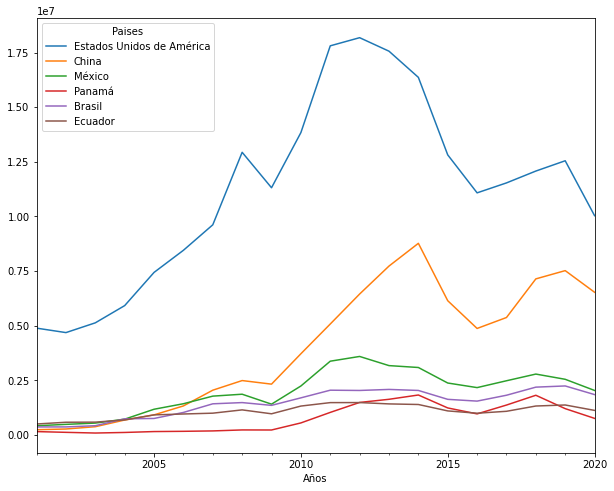

In [12]:
business_partners=M2[M2.Paises.isin(['Estados Unidos de América', 'China', 'México', 'Panamá','Brasil','Ecuador'])].copy()
business_partners['Años'] = pd.to_datetime(business_partners['Años'])
business_partners2=business_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st1 = business_partners2[['Estados Unidos de América','China','México','Panamá','Brasil','Ecuador']].plot(figsize=(10, 8))
st1

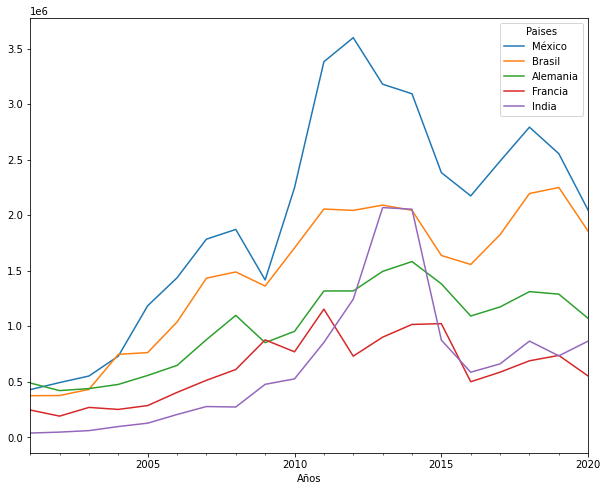

In [13]:
expo_partners=M2[M2.Paises.isin(['México', 'Brasil','Alemania','Francia','India'])].copy()
expo_partners['Años'] = pd.to_datetime(expo_partners['Años'])
expo_partners2=expo_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st2 = expo_partners2[['México','Brasil','Alemania','Francia','India']].plot(figsize=(10, 8))
st2

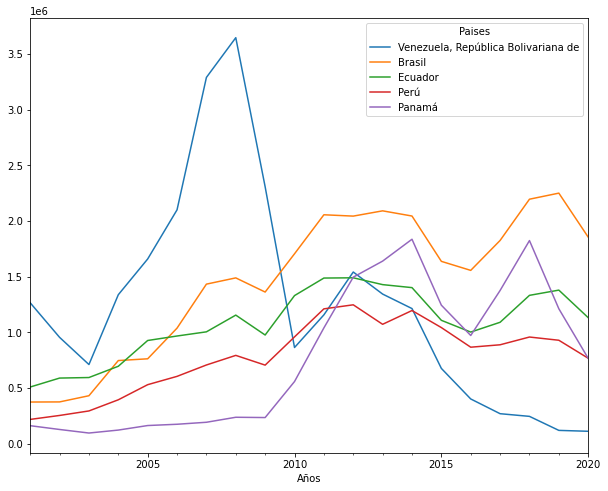

In [14]:
frontier_partners=M2[M2.Paises.isin(['Venezuela, República Bolivariana de', 'Brasil', 'Ecuador', 'Perú','Panamá'])].copy()
frontier_partners['Años'] = pd.to_datetime(frontier_partners['Años'])
frontier_partners2=frontier_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st3 = frontier_partners2[['Venezuela, República Bolivariana de','Brasil','Ecuador','Perú','Panamá']].plot(figsize=(10, 8))
st3

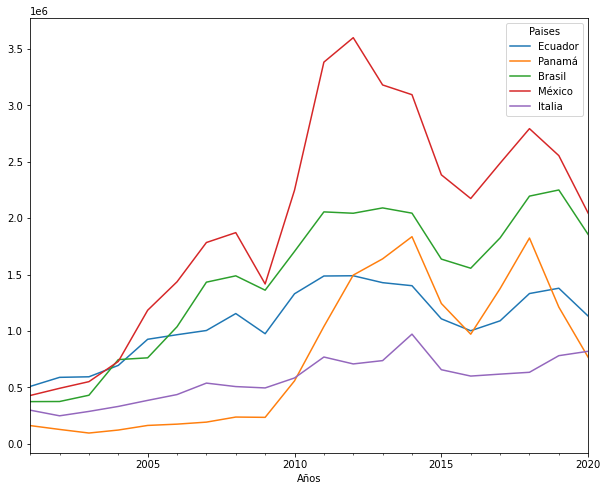

In [29]:
imp_partners=M2[M2.Paises.isin(['Panamá', 'Ecuador','Brasil','México','Italia'])].copy()
imp_partners['Años'] = pd.to_datetime(imp_partners['Años'])
imp_partners2=imp_partners.pivot_table(index='Años',columns='Paises',values='Valor')
st4 = imp_partners2[['Ecuador','Panamá','Brasil','México','Italia']].plot(figsize=(10, 8))

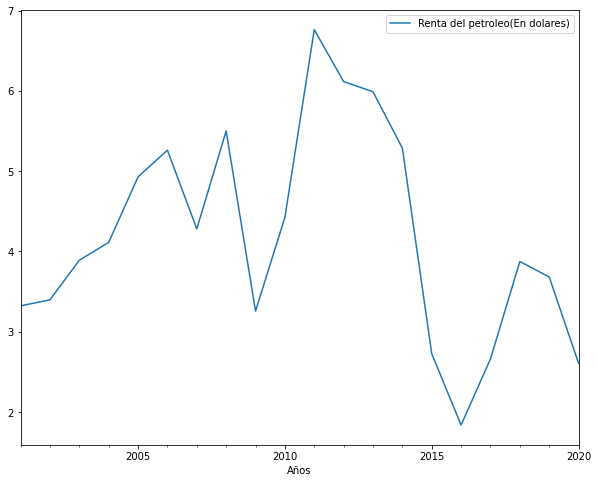

In [28]:
rent_oil = wb.data.DataFrame('NY.GDP.PETR.RT.ZS', ['COL'],time=range(2001,2021)).reset_index()
rent_oil1 = rent_oil.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
rent_oil2=pd.melt(rent_oil1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
rent_oil3=rent_oil2.rename(columns={'variable':'Años','value':'Renta del petroleo(En dolares)'})
rent_oil4=rent_oil3.drop(['index'],axis=1)
rent_oil4['Años'] = pd.to_datetime(rent_oil4['Años'])
r1=rent_oil4.set_index('Años')
rent_oil5=r1.filter(['Renta del petroleo(En dolares)'])
f1=rent_oil5.plot(figsize=(10, 8))

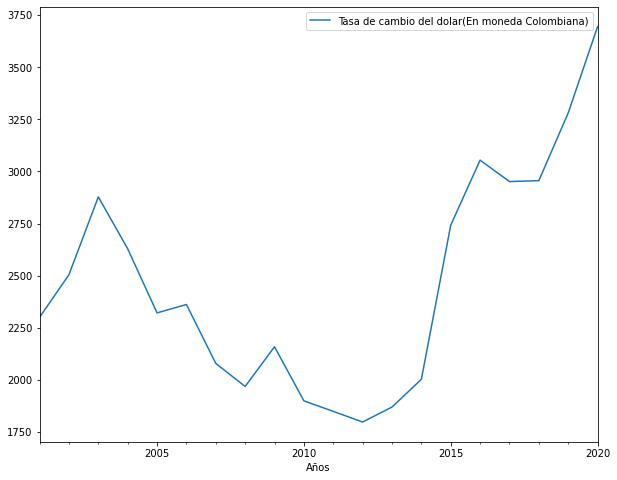

In [27]:
price_dollar=wb.data.DataFrame('PA.NUS.FCRF', ['COL'],time=range(2001,2021)).reset_index()
price_dollar1 = price_dollar.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
price_dollar2=pd.melt(price_dollar1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
price_dollar3=price_dollar2.rename(columns={'variable':'Años','value':'Tasa de cambio del dolar(En moneda Colombiana)'})
price_dollar4=price_dollar3.drop(['index'],axis=1)
price_dollar4['Años'] = pd.to_datetime(price_dollar4['Años'])
r2=price_dollar4.set_index('Años')
price_dollar5=r2.filter(['Tasa de cambio del dolar(En moneda Colombiana)'])
f2=price_dollar5.plot(figsize=(10, 8))

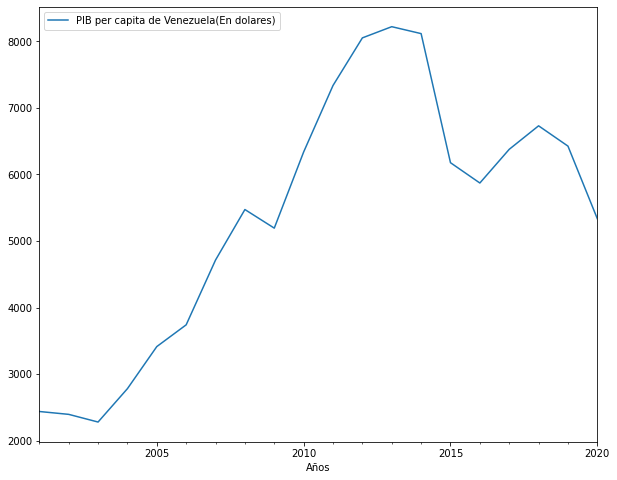

In [26]:
pibcap_ven=wb.data.DataFrame('NY.GDP.PCAP.CD', ['COL'],time=range(2001,2021)).reset_index()
pibcap_ven1 = pibcap_ven.rename(columns={'YR2001':'2001','YR2002':'2002','YR2003':'2003','YR2004':'2004','YR2005':'2005','YR2006':'2006','YR2007':'2007','YR2008':'2008','YR2009':'2009','YR2010':'2010','YR2011':'2011','YR2012':'2012','YR2013':'2013','YR2014':'2014','YR2015':'2015','YR2016':'2016','YR2017':'2017','YR2018':'2018','YR2019':'2019','YR2020':'2020'})
pibcap_ven2=pd.melt(pibcap_ven1, id_vars=['economy'], value_vars=['2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']).reset_index()
pibcap_ven3=pibcap_ven2.rename(columns={'variable':'Años','value':'PIB per capita de Venezuela(En dolares)'})
pibcap_ven4=pibcap_ven3.drop(['index'],axis=1)
pibcap_ven4['Años'] = pd.to_datetime(pibcap_ven4['Años'])
r3=pibcap_ven4.set_index('Años')
pibcap_ven5=r3.filter(['PIB per capita de Venezuela(En dolares)'])
f3=pibcap_ven5.plot(figsize=(10, 8))

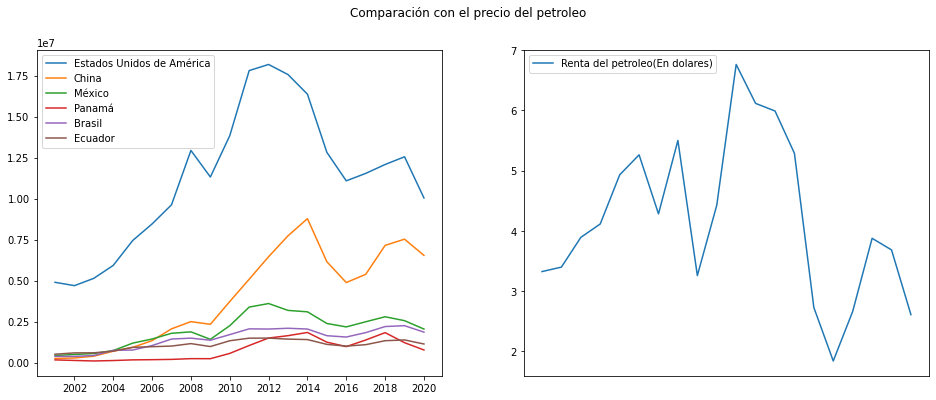

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación con el precio del petroleo')
ax1.plot(business_partners2[['Estados Unidos de América','China','México','Panamá','Brasil','Ecuador']])
ax1.legend(('Estados Unidos de América','China','México','Panamá','Brasil','Ecuador'),prop = {'size': 10}, loc='upper left')
plt.xticks(range(len(rent_oil5.columns.values)),rent_oil5.columns.values)
ax2.plot(rent_oil5)
ax2.legend(rent_oil5.columns.values)

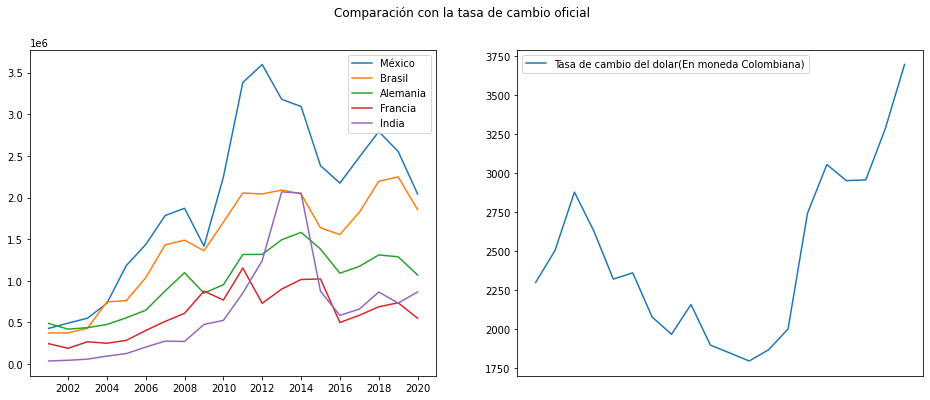

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación con la tasa de cambio oficial')
ax1.plot(expo_partners2[['México','Brasil','Alemania','Francia','India']])
ax1.legend(('México','Brasil','Alemania','Francia','India'),prop = {'size': 10}, loc='upper right')
plt.xticks(range(len(price_dollar5.columns.values)),price_dollar5.columns.values)
ax2.plot(price_dollar5)
ax2.legend(price_dollar5.columns.values)

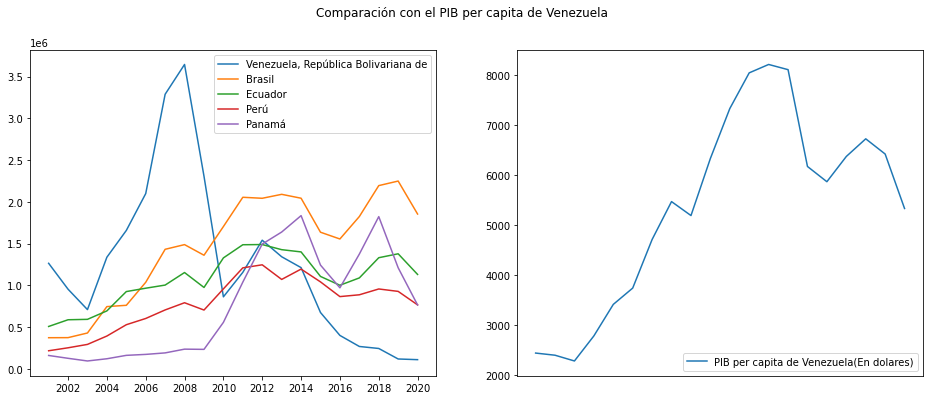

In [109]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Comparación con el PIB per capita de Venezuela')
ax1.plot(frontier_partners2[['Venezuela, República Bolivariana de','Brasil','Ecuador','Perú','Panamá']])
ax1.legend(('Venezuela, República Bolivariana de','Brasil','Ecuador','Perú','Panamá'),prop = {'size': 10}, loc='upper right')
plt.xticks(range(len(pibcap_ven5.columns.values)),pibcap_ven5.columns.values)
ax2.plot(pibcap_ven5)
ax2.legend(pibcap_ven5.columns.values)